## Final Project Submission

Please fill out:
* Student name: LEKISHORUMONGI WILFRED
* Student pace: PART TIME
* Scheduled project review date/time: 
* Instructor name:  MR. NOAH KANDIE & MR. WILLIAM OKOMBA
* Blog post URL:


## Introduction 

### Business Problem:

The goal of this project is to provide valuable insights to a real estate agency, which aims to offer data-driven recommendations to homeowners regarding home renovations and their potential impact on the estimated value of their properties. By leveraging statistical modeling techniques, the agency seeks to empower homeowners with actionable advice on how different home renovation projects may influence the resale value of their homes.

### Objective:

Utilize multiple linear regression modeling to analyze the King County House Sales dataset and identify key factors influencing home prices. By doing so, the real estate agency can offer personalized recommendations to homeowners regarding the types of renovations or improvements that could potentially increase the estimated value of their homes. Additionally, the agency aims to quantify the potential increase in home value associated with different renovation projects to provide homeowners with a clear understanding of the expected Return On Investment.

### Data Understanding:

The dataset used in this project is the King County House Sales dataset, comprising various features related to house sales in a northwestern county. It includes information such as the price of houses, number of bedrooms and bathrooms, square footage of living space and lot, condition, grade, year built, waterfront status, and dates of sale. Additionally, the dataset contains geographic information such as latitude and longitude, as well as details on any renovations. Some features, such as waterfront and condition, are categorical, while others, like price and square footage, are numerical. The dataset contains a total of 21 columns and 21,597 entries. Initial exploration reveals missing values in certain columns, which require preprocessing before conducting statistical modeling.

## 1. Importing the necessary libraries 
Start by importing necessary python libraries

In [12]:
# Importing the necessary libraries and loading data with pandas
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
                        

## 2. Loading our data set

In [13]:
raw_data =  pd.read_csv('data/kc_house_data.csv')
print(raw_data.columns)
raw_data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Data Preparation.

In [15]:
#Creating a copy of our dataset
data =  raw_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
#Checking the correlation of the features and that of the target variable
data.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### 3.1. Data Cleaning.

In [17]:
# Checking for null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# Cleaning the waterfront column
# We replace the missing values with 'No' to indicate that the property does not have a waterfront

data['waterfront'] = data['waterfront'].fillna('NO')

#droping the id column
data.drop('id', axis = 1, inplace = True)

#droping columns with the view missing
data.dropna(subset=['view'], inplace = True, axis = 0)

# converting the data column to a datetime datatype
data['date'] =  pd.to_datetime(data['date'])

The mean of the year of renovation column indicates that some houses were yet to renovated or the infomation on when the house was renovated was not captured. Hence we create an additional column to represent whether the house was ever renovated or not and drop the yr_renovated column since 16961 entries are missing or 0

In [19]:
# Creating a column to represent if a house has been renovated or not
data['renovated'] = data['yr_renovated'].apply(lambda year: 'No' if year == 0 else 'Yes')

In [20]:
# Dropping unecessary columns for our data
cols_to_drop = ['date','view','yr_renovated','zipcode','lat','long']
data = data.drop(columns=cols_to_drop)

In [21]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

In [22]:
#Checking our data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  object 
 7   condition      21534 non-null  object 
 8   grade          21534 non-null  object 
 9   sqft_above     21534 non-null  int64  
 10  sqft_basement  21534 non-null  object 
 11  yr_built       21534 non-null  int64  
 12  sqft_living15  21534 non-null  int64  
 13  sqft_lot15     21534 non-null  int64  
 14  renovated      21534 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 2.6+ MB


Some features, such as waterfront and condition, are categorical, while others, like price and square footage, are numerical. The dataset contains a total of 21 columns and 21,597 entries. Initial exploration reveals missing values in certain columns, which require preprocessing before conducting statistical modeling.

In [23]:
# Checking the sqft_basement column
data['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21534, dtype: object

In [24]:
# Convertion the values in the sqft_basement to a numeric data type 
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [25]:
data['sqft_basement'].describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In this case, given that the mean is 291.85 and the median (50th percentile) is 0, Therefore we impute the missing values with the median. This way we preserve the distribution's integrity.

In [26]:
# Calculate the median of the column
median_value = data['sqft_basement'].median()

# Replace missing values with the median
data['sqft_basement'].fillna(median_value, inplace=True)

data['sqft_basement'].dtype

dtype('float64')

In [27]:
#Creating a copy of a data

cleaned_data =  data.copy()

## 4. Data Visualization

Visualizing the distribution of our target variable, Price

<function matplotlib.pyplot.show(close=None, block=None)>

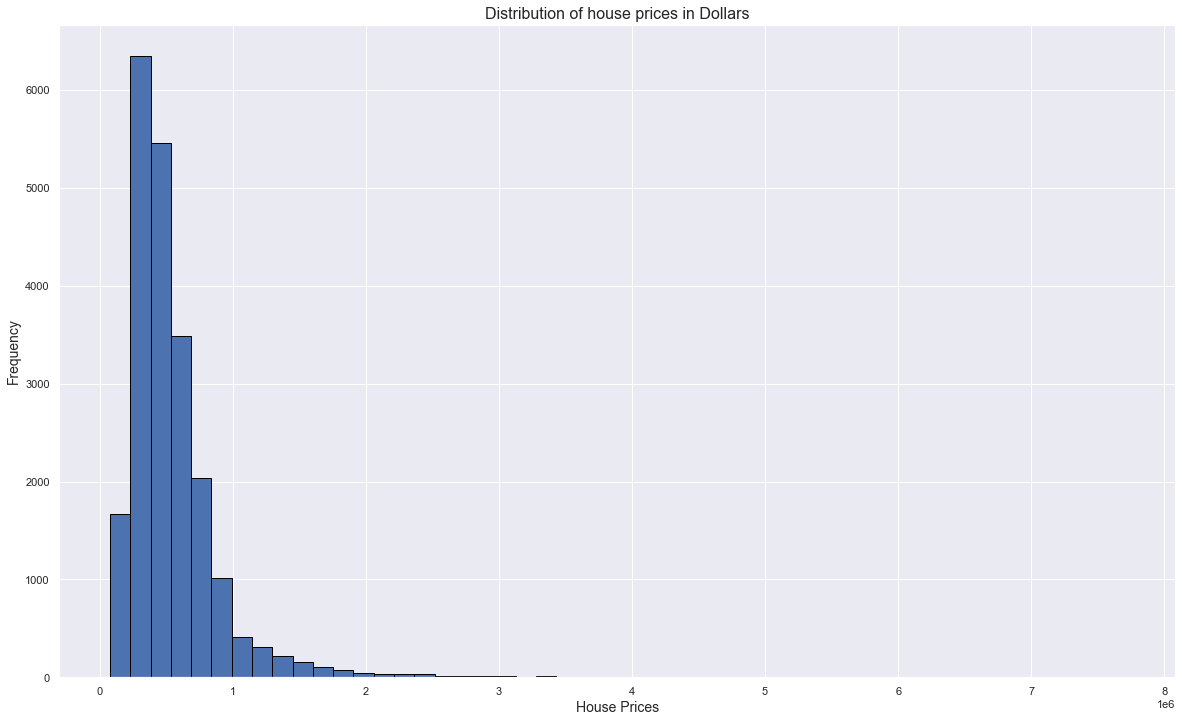

In [28]:
plt.figure(figsize=(20, 12))
plt.hist(data['price'], bins = 50, edgecolor =  'black')
plt.title('Distribution of house prices in Dollars', fontsize = 16)
plt.xlabel('House Prices', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show

In [25]:
price_mean = data['price'].mean()
price_mode = data['price'].mode()
price_median = data['price'].median()

print(f'The Mean of Price is:{price_mean}')
print(f'The Median of Price is:{price_median}')
print(f'The Mode of Price is:{price_mode}')

The Mean of Price is:540057.663833937
The Median of Price is:450000.0
The Mode of Price is:0    350000.0
1    450000.0
Name: price, dtype: float64


Based on our data and the Histogram above, House Prices are positively skewed, meaning that: Mode < Median < Mean

## 4.1 Correlation Matrix

In [29]:
#Checking the correlation of our numerial variables and target variable(price)
cor_price = data.corr()['price']
cor_price.sort_values(ascending = False)

price            1.000000
sqft_living      0.701587
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
sqft_basement    0.319082
bedrooms         0.308063
floors           0.257052
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
Name: price, dtype: float64

<AxesSubplot:>

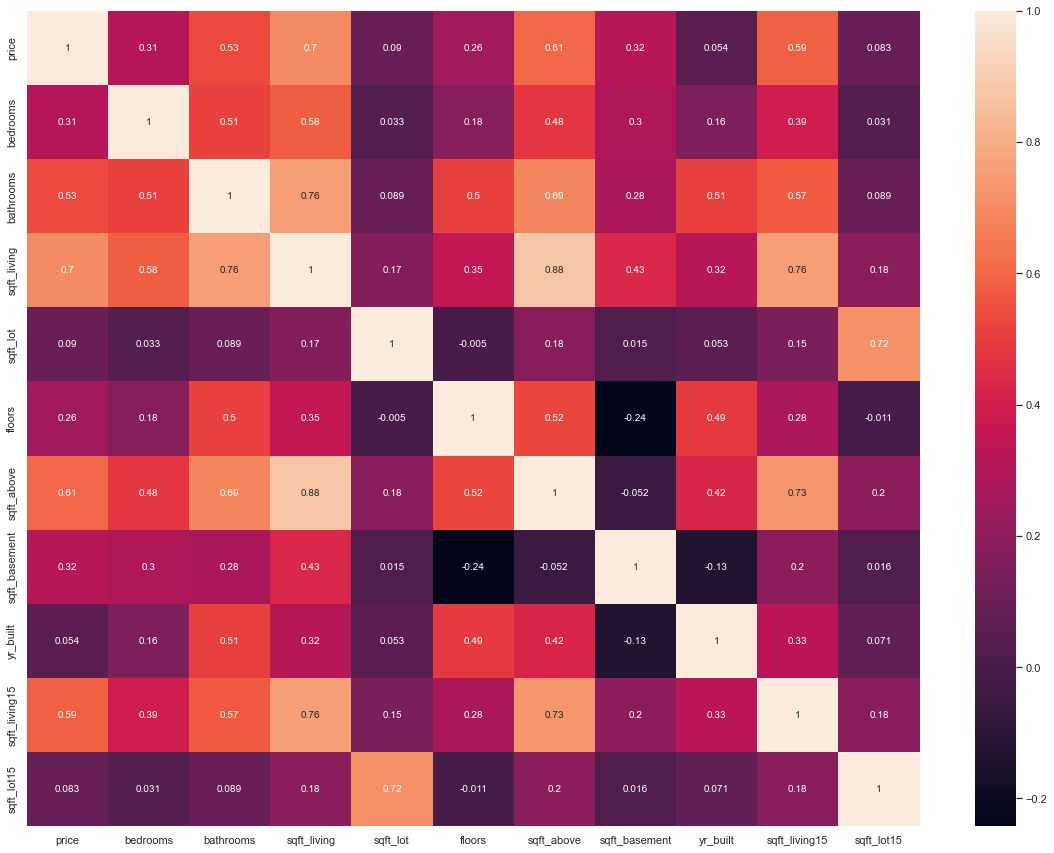

In [28]:
plt.figure(figsize = (20,15))
sns.heatmap(cleaned_data.corr(), annot = True)

Based on the above correlation matrix, it can be observed that the Square footage of living space other than the basement has the highest positive correlation to the price of 0.70. Which is a strong correlation. Additionally,the yr_build variable had the least correlation of 0.054

## 4.2 Visualizing the categorical Variables

1. Price vs Waterfront

In [30]:
data['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

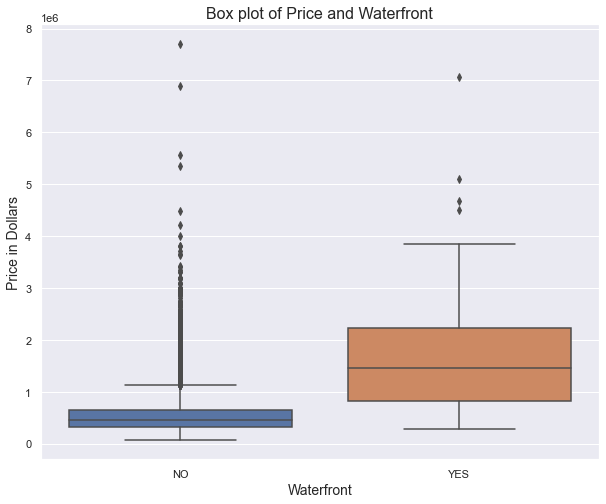

In [30]:
#Checking the distribution of price based on whether it has a waterfront or not

plt.figure(figsize=(10, 8))
sns.boxplot(x='waterfront', y='price', data=data)
plt.xlabel('Waterfront', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.title('Box plot of Price and Waterfront', fontsize = 16)
plt.show()

From the Box plot above, we can observe that the price of a house tends to be higher when the house has a waterfront. Additionally, houses that do not have a waterfront tend to have more outliers than those with waterfronts

2. Price Vs Condition

In [31]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

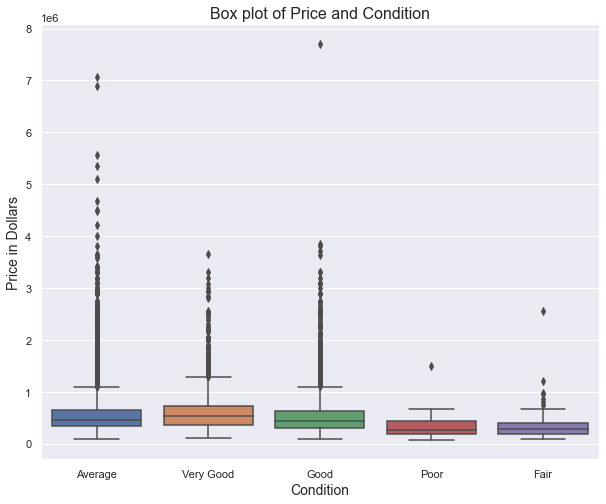

In [33]:
#Checking the distribution of price based on condition 

plt.figure(figsize=(10, 8))
sns.boxplot(x='condition', y='price', data=data)
plt.xlabel('Condition', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.title('Box plot of Price and Condition',fontsize = 16)
plt.show()

3. Price Vs Grade

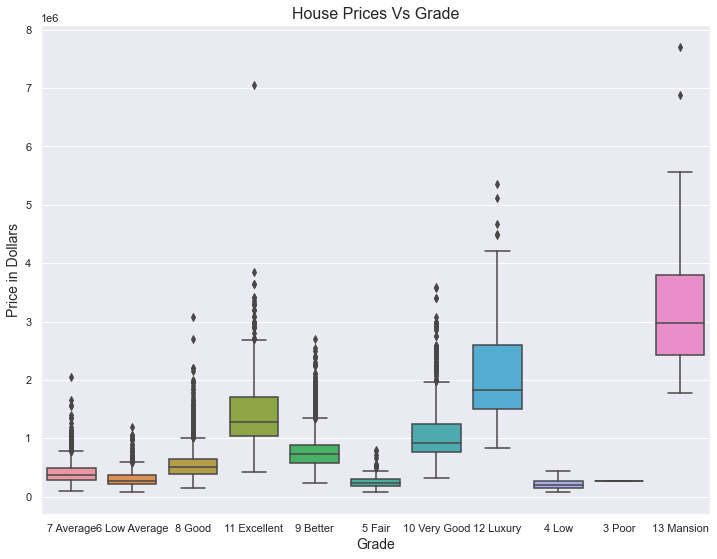

In [34]:
#Checking the distribution of price and Grade
plt.figure(figsize=(12, 9))
sns.boxplot(x='grade', y='price', data=data)
plt.xlabel('Grade', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.title('House Prices Vs Grade',fontsize = 16)
plt.show()

In [32]:
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

4. Price vs Renovated

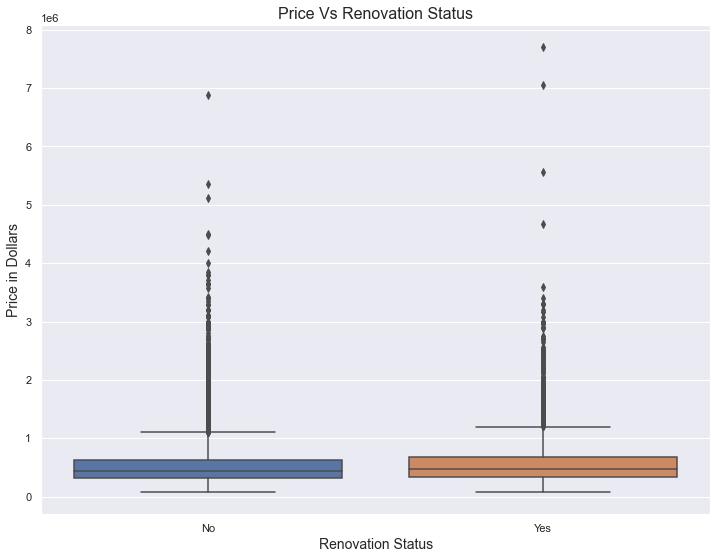

In [33]:
#Checking the distribution of price and Renovation status
plt.figure(figsize=(12, 9))
sns.boxplot(x='renovated', y='price', data=data)
plt.xlabel('Renovation Status', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.title('Price Vs Renovation Status', fontsize = 16)
plt.show()

Based on the renovation status, the price on houses that have been renovated and those that have not been renovated seem to be the same.

### 4.3 Visualizing Some of our numeric features

We visualize the relationship between price and some of the independent variables with the highest correlation

1. Price vs Square footage of living space in the home (sqft_living)

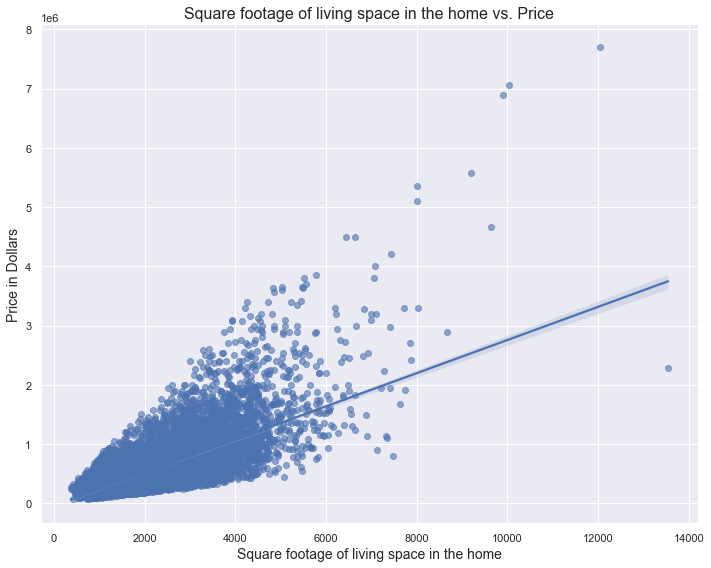

In [34]:
# Scatter plot of sqft_living vs. price
plt.figure(figsize=(10, 8))
sns.regplot(data=data, x='sqft_living', y='price', scatter_kws={'alpha':0.6})
plt.title('Square footage of living space in the home vs. Price', fontsize =16)
plt.xlabel('Square footage of living space in the home', fontsize = 14)
plt.ylabel('Price in Dollars',fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Price vs sqft_above

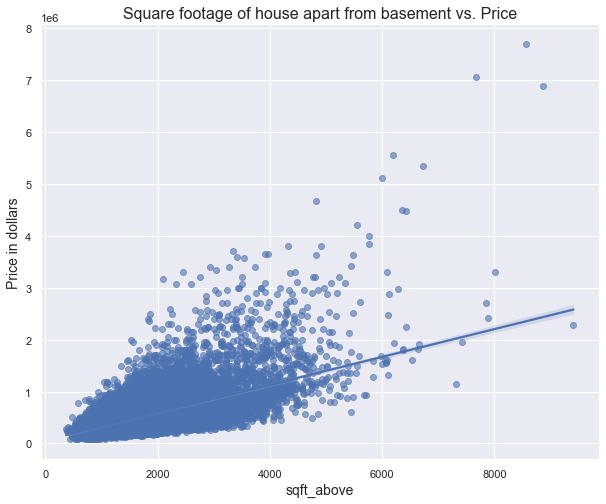

In [35]:
# Scatter plot of Square footage of house apart from basement(sqft_above) vs. price
plt.figure(figsize=(10, 8))
sns.regplot(data=data, x='sqft_above', y='price', scatter_kws={'alpha':0.6})
plt.title('Square footage of house apart from basement vs. Price', fontsize = 16)
plt.xlabel('sqft_above', fontsize = 14)
plt.ylabel('Price in dollars', fontsize = 14)
plt.grid(True)
plt.show()

3. Price vs Number of Bathrooms

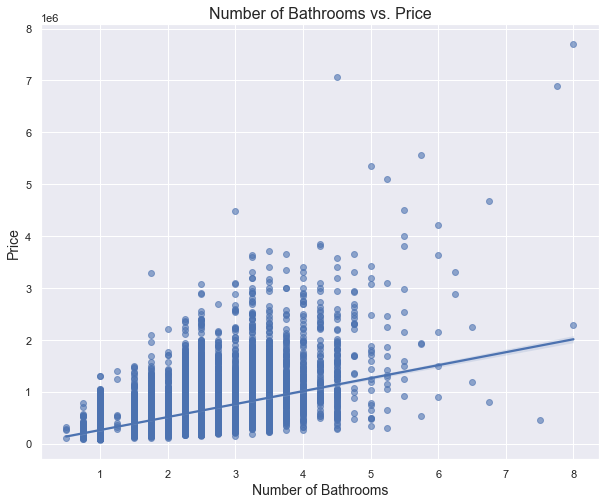

In [36]:
# Scatter plot of Number of bathrooms vs. price
plt.figure(figsize=(10, 8))
sns.regplot(data=data, x='bathrooms', y='price', scatter_kws={'alpha':0.6})
plt.title('Number of Bathrooms vs. Price', fontsize = 16)
plt.xlabel('Number of Bathrooms', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(True)
plt.show()

The three graphs above illustrate the presense of a positive relationship between Square footage of living space in the home, Number of Bathrooms, Square footage of house apart from basement and Price of the home.

## 5. Regression Modeling.

In [41]:
#Checking the correlation on our independent variable
cleaned_data.corr()['price'].sort_values(ascending =  False)

price            1.000000
sqft_living      0.701587
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
sqft_basement    0.319082
bedrooms         0.308063
floors           0.257052
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
Name: price, dtype: float64

### 5.1 Simple Linear Model

In [42]:
# Creating our target and feature variables
y = cleaned_data['price']
X = cleaned_data['sqft_living']

# Create an OLS model
model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = model.fit()

In [43]:
#Checking the model results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:59:23   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.215e+04   4404.521     -9.570      

### Observations.


1. Our Model and coefficient are statistically significant, because the F-value is less than our assumed alpha of 0.05.
2. Our Adjusted R Squared is 0.493, hence the model eplains 49.2% of the variance in price, target variable.
3. For a square-feet living of 0, our model would predict a price of -0.0004399 dollars. An increase of 1 square-feet living, would increase the price by 280.8630.
4. The condition number is 5630. Since our condition number is above 100, there is evidence of a multicollinearity issue hence further modeling using additional feature variables

### 5.2 Multiple Regression Model

In [44]:
cleaned_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [45]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  object 
 7   condition      21534 non-null  object 
 8   grade          21534 non-null  object 
 9   sqft_above     21534 non-null  int64  
 10  sqft_basement  21534 non-null  float64
 11  yr_built       21534 non-null  int64  
 12  sqft_living15  21534 non-null  int64  
 13  sqft_lot15     21534 non-null  int64  
 14  renovated      21534 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 2.6+ MB


In [46]:
#Creating dummies for our categorical variables: condition, waterfront,renovated variables
# List of columns to create dummy variables for
columns_create_dummies = ['waterfront', 'condition', 'grade', 'renovated']

# Iterate over each column and create dummy variables
for column in columns_create_dummies:
    cleaned_data = pd.get_dummies(cleaned_data, columns=[column], drop_first=True)

# Display the DataFrame with dummy variables
print(cleaned_data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       sqft_above  sqft_basement  yr_built  sqft_living15  ...  \
0            1180            0.0      1955           1340  ...   
1            21

In [47]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   bathrooms            21534 non-null  float64
 3   sqft_living          21534 non-null  int64  
 4   sqft_lot             21534 non-null  int64  
 5   floors               21534 non-null  float64
 6   sqft_above           21534 non-null  int64  
 7   sqft_basement        21534 non-null  float64
 8   yr_built             21534 non-null  int64  
 9   sqft_living15        21534 non-null  int64  
 10  sqft_lot15           21534 non-null  int64  
 11  waterfront_YES       21534 non-null  uint8  
 12  condition_Fair       21534 non-null  uint8  
 13  condition_Good       21534 non-null  uint8  
 14  condition_Poor       21534 non-null  uint8  
 15  condition_Very Good  21534 non-null 

In [48]:
#Assigning the target variable and independent variables
y = cleaned_data['price']
X = cleaned_data.drop(['price'], axis = 1)

In [52]:
# Create an OLS model
model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = model.fit()

#Printing a summary of our results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1723.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:32:38   Log-Likelihood:            -2.9430e+05
No. Observations:               21534   AIC:                         5.886e+05
Df Residuals:                   21507   BIC:                         5.889e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.136e+06   1

In [49]:
coefficients_table = results.params.sort_values(ascending = True)
print(coefficients_table)

const         -42152.946806
sqft_living      279.932115
dtype: float64


Observations.

1. Our Model and coefficient are statistically significant, because the F-value is less than our assumed alpha of 0.05.
2. Our Adjusted R Squared is 0.675, hence the model eplains 67.5% of the variance in price, target variable.
3. Our intercept is 7136000, meaning that the price of a house will start from 7136000 dollars
4. The condition number is 7430000. Since our condition number is above 100, there is evidence of a multicollinearity issue hence further modeling using additional feature variables

From the above results, calculated t-value for sqft_lot and sqft_above is above the assumed alpha of 0.05, therefore we drop the variables and assess if our model performs better

In [50]:
#Assigning the target variable and independent variables, droping the sqft_lot and sqft_above columns to observe if our model is better
y = cleaned_data['price']
X = cleaned_data.drop(['price','sqft_lot','sqft_above'], axis = 1)

# Create an OLS model
model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = model.fit()

#Printing a summary of our results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1867.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:00:09   Log-Likelihood:            -2.9430e+05
No. Observations:               21534   AIC:                         5.886e+05
Df Residuals:                   21509   BIC:                         5.888e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.138e+06   1

From the above OLS model, The adjusted R remains the same at 0.675, but the condition number has reduced to 4.43e+06

### 4.3 Normalization of our model

In [52]:
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix X
X_scaled = scaler.fit_transform(X)

# Fit and transform the target vector y
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Convert scaled feature matrix back to DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Convert scaled target vector back to Series if needed
y_scaled_series = pd.Series(y_scaled, name=y.name)

# Now you can create your OLS model using the scaled features and target
model = sm.OLS(endog=y_scaled_series, exog=sm.add_constant(X_scaled_df))

#fiting our model
results = model.fit()

# Print the summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1867.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:03:15   Log-Likelihood:                -18434.
No. Observations:               21534   AIC:                         3.692e+04
Df Residuals:                   21509   BIC:                         3.712e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.469e-18    

Further normalization of our features and target variable yields the same adjusted R Squared of 0.675

## 6. Observations

1. R-Squared Value. The R-squared value of 0.676 indicates that the model explains approximately 67.6% of the variance in the target variable (price). This suggests that the model has a moderate level of explanatory power.

2. Significance of Predictors. Several predictors have statistically significant coefficients. That is the calculated P-values is less than the assumed alpfa of 0.05.indicating that they have a significant impact on the price of houses.

3. Coefficient Interpretation: The coefficients represent the change in the target variable (price) for a one-unit change in the predictor variable, holding all other variables constant.

4. Intercept: The intercept term (const) represents the expected price of a house when all predictor variables are zero.

5. Positive/Negative Coefficients: Positive coefficients indicate a positive relationship between the predictor variable and the price of houses, while negative coefficients indicate a negative relationship.

6. Waterfront Variable: The coefficient for the waterfront variable is particularly large, suggesting that houses with waterfront views have a substantial impact on price.

7. Grade Variable: The grade variable includes multiple categories, each representing different levels of house quality. Higher-grade categories have positive coefficients, indicating that houses with higher quality grades tend to have higher prices.

8. Renovated Variable: The coefficient for the renovated variable (renovated_Yes) is positive and statistically significant (p < 0.05), suggesting that renovated houses tend to have higher prices compared to non-renovated houses.

## 7. Recommendations

1. Consider Waterfront Properties: Given the significant impact of waterfront properties on price, buyers interested in premium properties may prioritize houses with waterfront views.

2. Focus on Grade: Buyers seeking high-quality houses should pay attention to the grade variable, as higher-grade categories tend to command higher prices.

3. Evaluate Renovated Properties: Sellers may benefit from renovating their properties, as renovated houses tend to have higher prices. Buyers should also consider renovated properties when looking for houses with increased value potential.

4. Further Analysis: Conduct further analysis to explore potential interactions between predictor variables and identify any additional factors that may influence house prices.